<center><h1 style="font-size:2em;color:#2467C0;font-family:Times New Roman">Tagesaufgaben Decision Tree & Random Forest</h1></center>

<div class="alert alert-success" role="alert">
  <h4 class="alert-heading" style="font-size:1em">Aufgabe1:</h4>
  <hr>

   <h4>
      Splitte den diabetes-Datensatz in Trainings- und Testdatensatz mit einer Quote 0,8 zu 0,2 auf. Nutze zum einen einen Decision Tree für die Modellerstellung und zum anderen einen Random Forest. Die "Outcome" Spalte ist die zu erklärende Variable, während alle anderen metrischen Daten Prädiktoren sind.<br><br>
      Versuche Hyperparameter zu finden, die deine Modelle optimieren (Für den Decision Tree: criterion, max_depth und max_features. Für den Forest: criterion und max_depth) <hr>
</h4>
</div>

In [1]:
# imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report

In [2]:
data = pd.read_csv("diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


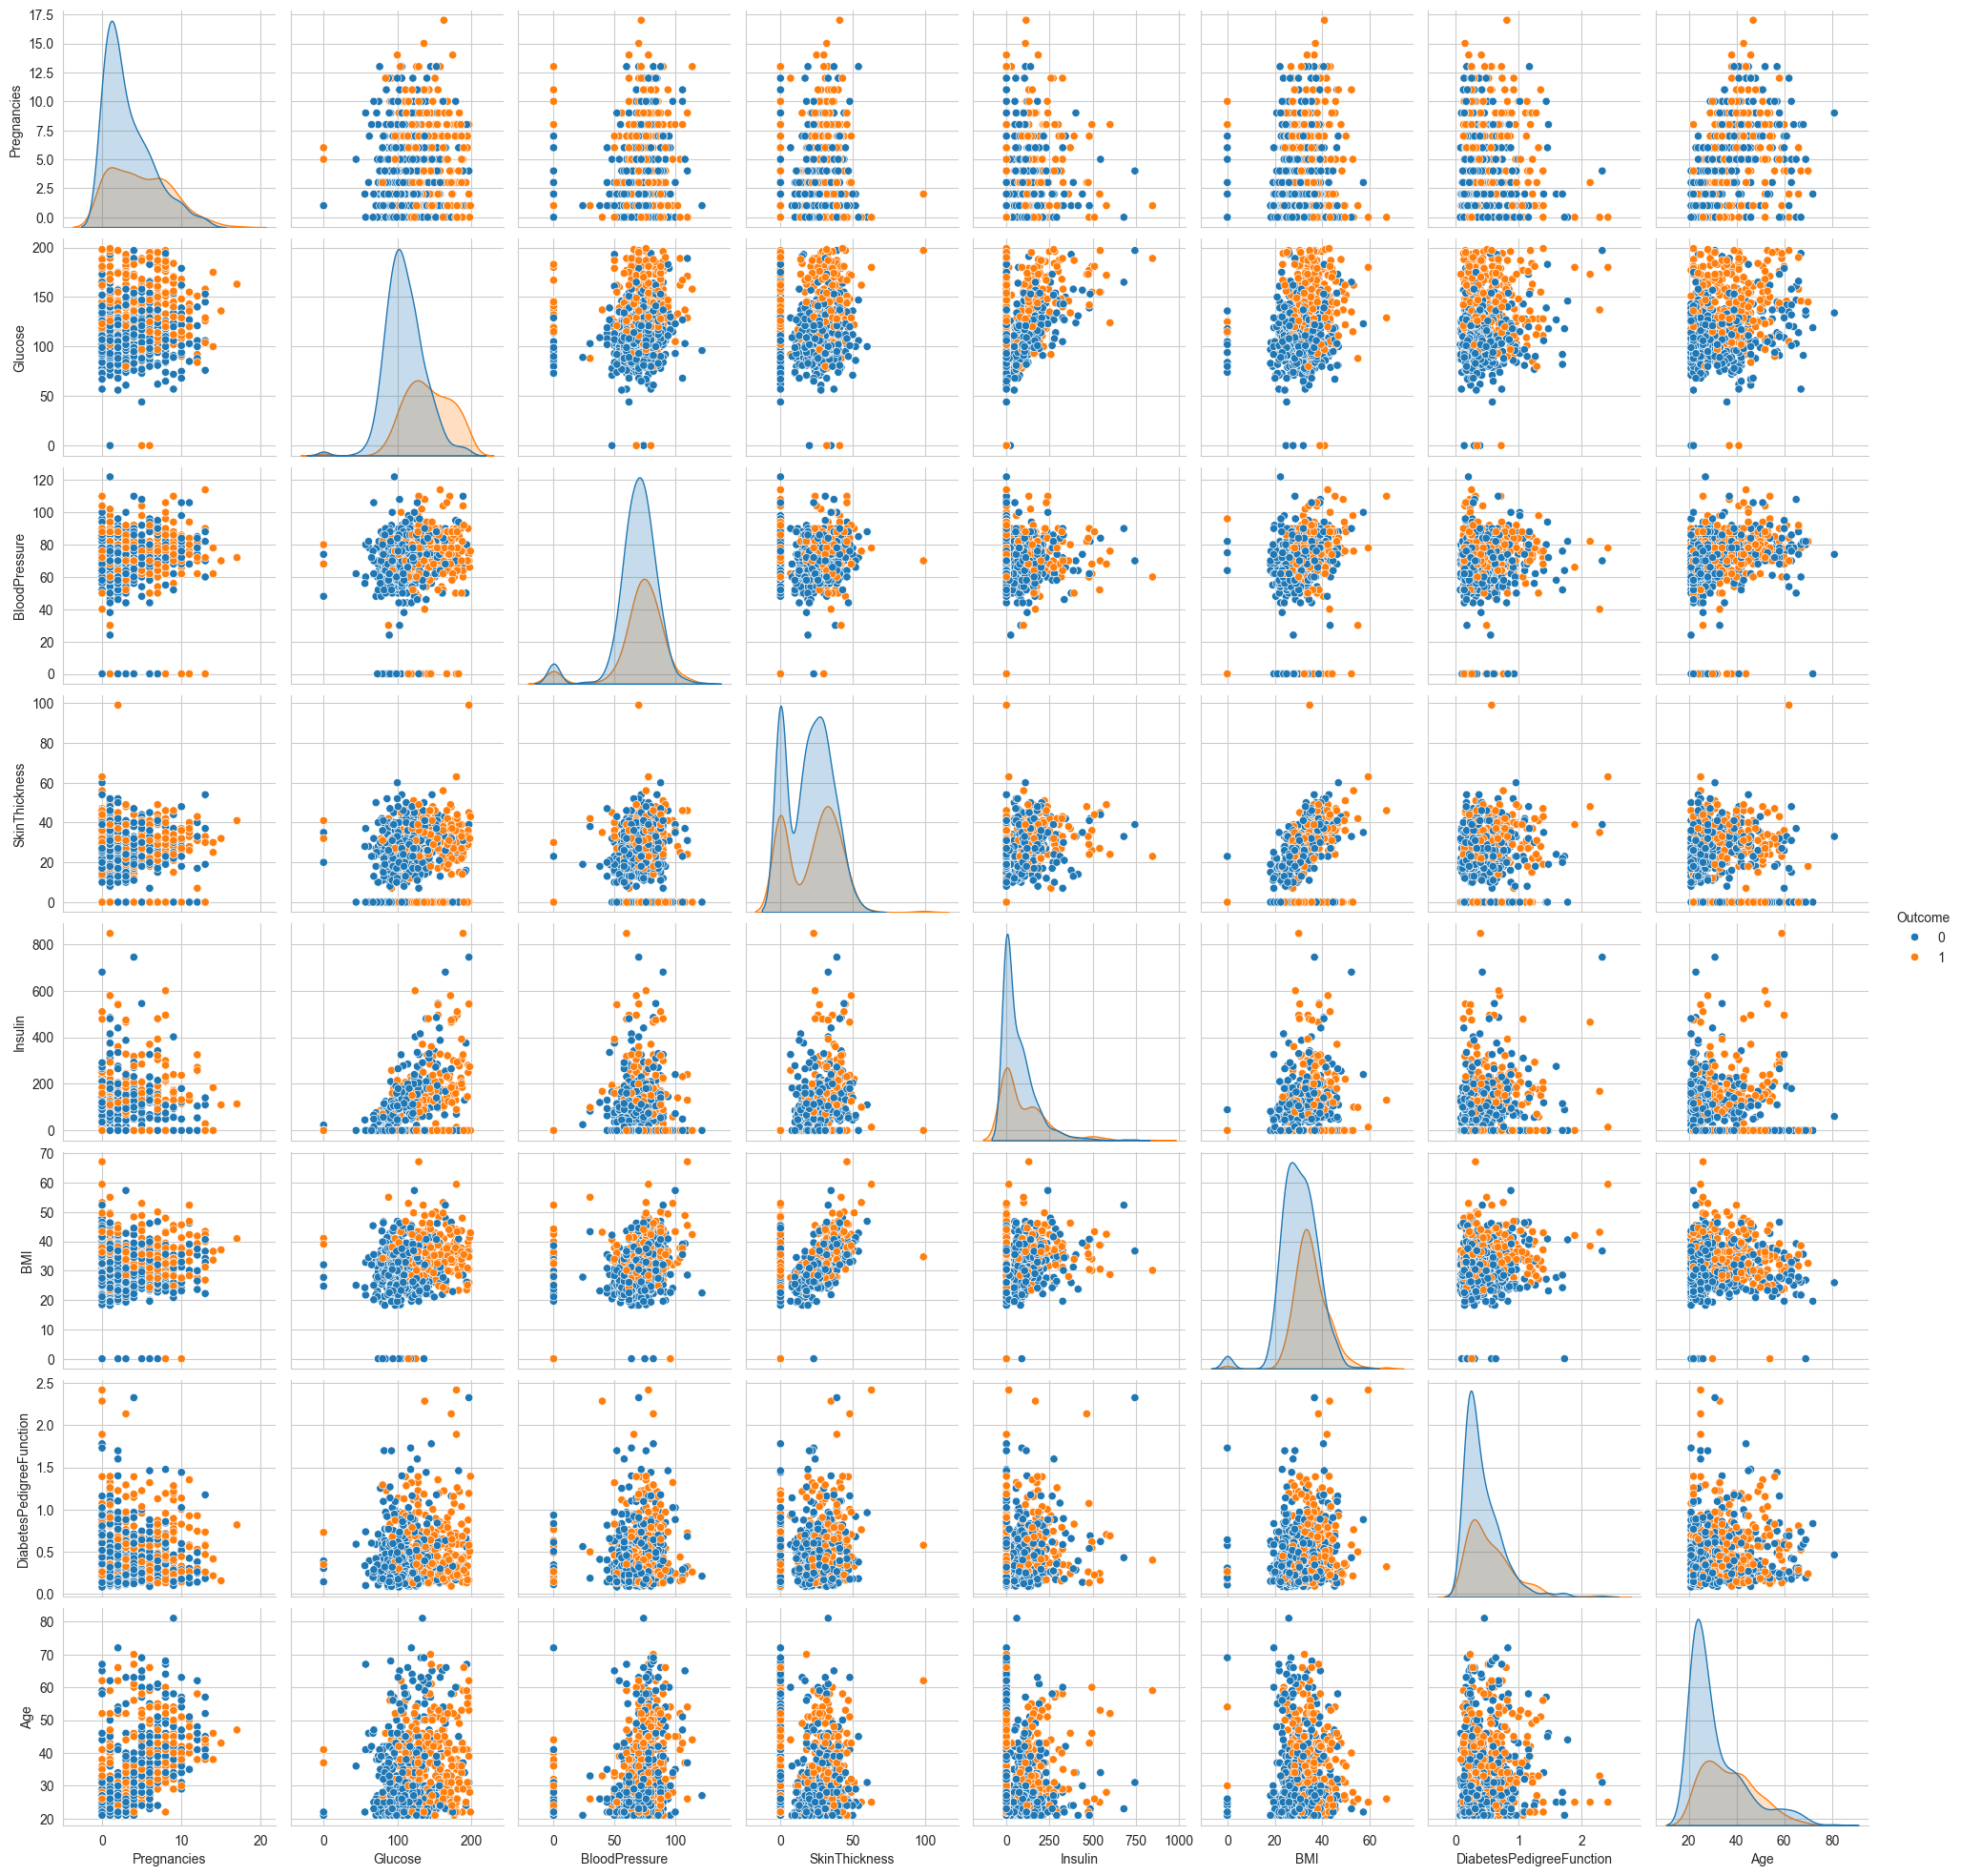

In [3]:
# Pairplot
sns.pairplot(data, hue="Outcome")
plt.show()

In [4]:
# NaN's ?
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
# Features & Target (X & y)
X = data[[
	"Pregnancies",
	"Glucose",
	"BloodPressure",
	"SkinThickness",
	"Insulin",
	"BMI",
	"DiabetesPedigreeFunction",
	"Age"
]]
y = data["Outcome"]

In [6]:
# Features
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [7]:
# Target
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [8]:
# TrainTestSplit
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

DecisionTree Accuracy: 0.734


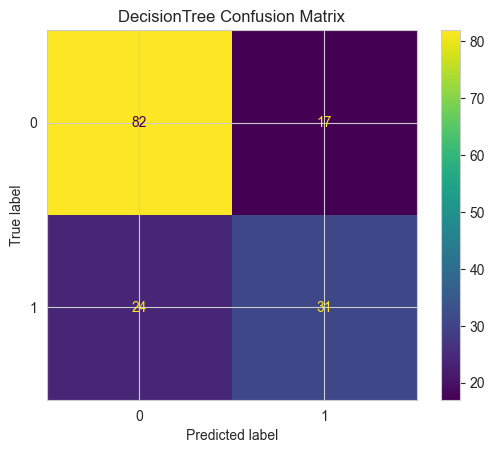


Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        99
           1       0.65      0.56      0.60        55

    accuracy                           0.73       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154



In [9]:
# DecisionTree with Hyperparams
dt_model = DecisionTreeClassifier(criterion="entropy", max_depth=5, max_features="sqrt", random_state=42)
dt_model.fit(X_train, y_train)
dt_score = dt_model.score(X_test, y_test)
print(f"DecisionTree Accuracy: {dt_score:.3f}")

# Generate predictions 
y_pred = dt_model.predict(X_test)

# Display confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("DecisionTree Confusion Matrix")
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

RandomForest Accuracy: 0.747


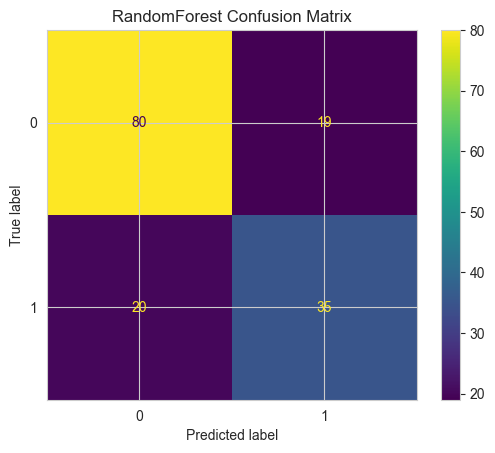


Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.81      0.80        99
           1       0.65      0.64      0.64        55

    accuracy                           0.75       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154



In [10]:
# RandomForest with Hyperparams
# Define Hyperparameas
criterion = "gini"
max_depth = 8
n_estimators = 100
random_state = 42

# Create and train model with parameters
rf_model = RandomForestClassifier(
	criterion=criterion,
	max_depth=max_depth,
	n_estimators=n_estimators,
	random_state=random_state
)
rf_model.fit(X_train, y_train)
rf_score = rf_model.score(X_test, y_test)
print(f"RandomForest Accuracy: {rf_score:.3f}")

# Generate predictions
y_pred = rf_model.predict(X_test)

# Display confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("RandomForest Confusion Matrix")
plt.show()

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))